In [46]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [47]:
# Show current directory
import os
print(os.getcwd())

/scratch/marcel/Pyroclast/examples/2D/stokes_circular_inclusion


In [48]:
# Open all frames
raw_frames = []
nframes = 230
for i in range(nframes):
    f=np.load(f'frame_{str(i).zfill(4)}.npz')
    raw_frames.append(f)

In [49]:
# Import modules for animation
import matplotlib.animation as anim

In [50]:
# Set jshtml as the animation writer
plt.rcParams['animation.html'] = 'jshtml'

In [51]:
x = np.linspace(0, 1e5, 102)
y = np.linspace(0, 1e5, 132)
X, Y = np.meshgrid(x, y)

In [52]:
import tqdm

48it [01:42,  2.14s/it]                                           | 0/46 [00:00<?, ?it/s]


  2%|█▏                                                   | 1/46 [00:00<00:07,  5.96it/s]

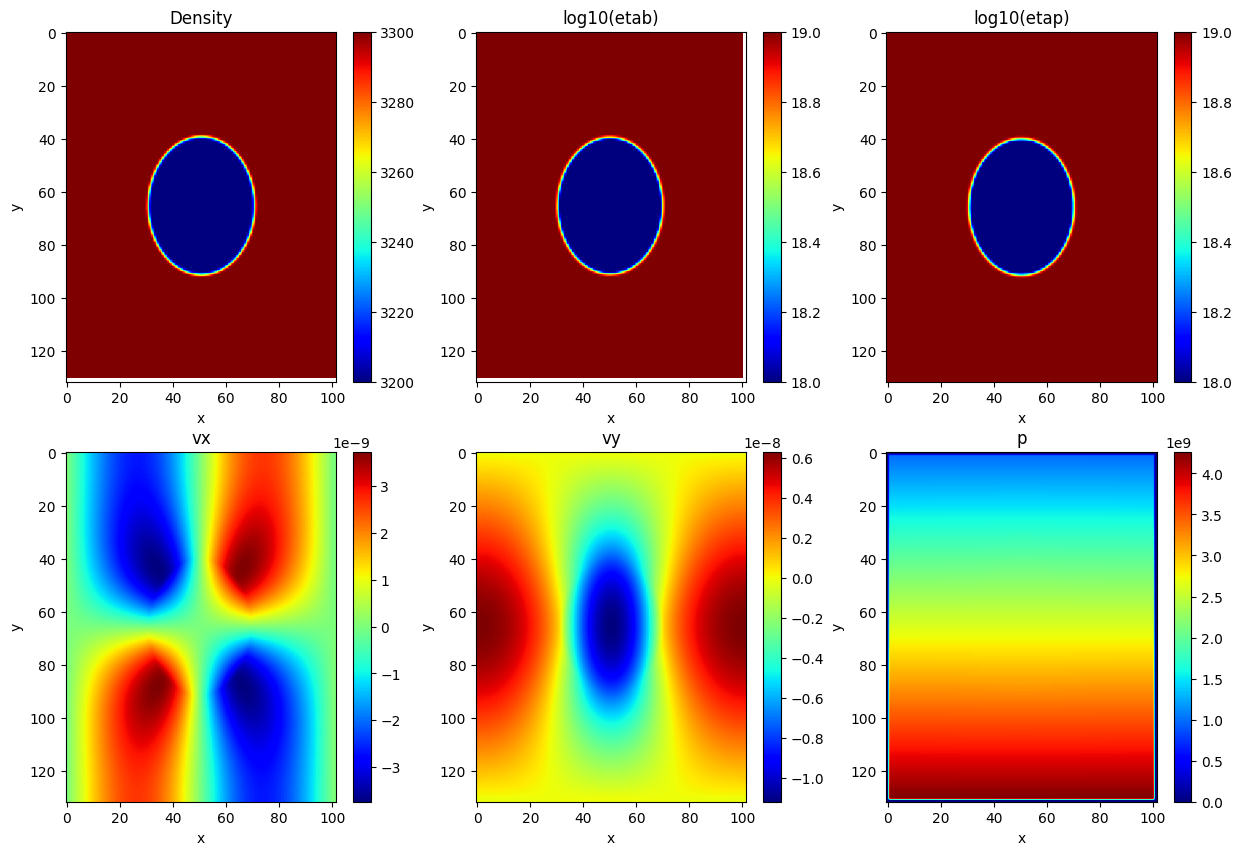

In [53]:
# Animate a 2x3 plot of rho, log10(etab), log10(etap), vx, vy and p
# the first three should be shown with imshow and the last three with contourf using the X, T meshgrid
# All plots should have a colorbar

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

downsample = 5
frames = raw_frames[::downsample]
nframes = len(frames)
pbar = tqdm.tqdm(total=nframes)
cbar_exists = False

def animate(i):
    rho = frames[i]['rho']
    etab = frames[i]['etab']
    etap = frames[i]['etap']
    vx = frames[i]['vx']
    vy = frames[i]['vy']
    p = frames[i]['p']
    global cbar_exists

    rho_plt = axs[0, 0].imshow(rho, cmap='jet')
    axs[0, 0].set_title('Density')
    axs[0, 0].set_xlabel('x')
    axs[0, 0].set_ylabel('y')
    if not cbar_exists:
        fig.colorbar(rho_plt, ax=axs[0, 0])

    etab_plt = axs[0, 1].imshow(np.log10(etab), cmap='jet')
    axs[0, 1].set_title('log10(etab)')
    axs[0, 1].set_xlabel('x')
    axs[0, 1].set_ylabel('y')
    if not cbar_exists:
        fig.colorbar(etab_plt, ax=axs[0, 1])


    etap_plt = axs[0, 2].imshow(np.log10(etap), cmap='jet')
    axs[0, 2].set_title('log10(etap)')
    axs[0, 2].set_xlabel('x')
    axs[0, 2].set_ylabel('y')
    if not cbar_exists:
        fig.colorbar(etap_plt, ax=axs[0, 2])

    # axs[1, 0].contourf(X, Y, vx, cmap='jet', levels=100)
    vx_plt = axs[1, 0].imshow(vx, cmap='jet')
    axs[1, 0].set_title('vx')
    axs[1, 0].set_xlabel('x')
    axs[1, 0].set_ylabel('y')
    if not cbar_exists:
        fig.colorbar(vx_plt, ax=axs[1, 0])

    # axs[1, 1].contourf(X, Y, vy, cmap='jet', levels=100)
    vy_plt = axs[1, 1].imshow(vy, cmap='jet')
    axs[1, 1].set_title('vy')
    axs[1, 1].set_xlabel('x')
    axs[1, 1].set_ylabel('y')
    if not cbar_exists:
        fig.colorbar(vy_plt, ax=axs[1, 1])

    # axs[1, 2].contourf(X, Y, p, cmap='jet', levels=100)
    p_plt = axs[1, 2].imshow(p, cmap='jet')
    axs[1, 2].set_title('p')
    axs[1, 2].set_xlabel('x')
    axs[1, 2].set_ylabel('y')
    if not cbar_exists:
        fig.colorbar(p_plt, ax=axs[1, 2])

    cbar_exists = True

    pbar.update(1)


ani = anim.FuncAnimation(fig, animate, frames=nframes, interval=100)

In [54]:
# Save the animation to mp4 file
ani.save('animation.mp4', writer='ffmpeg', fps=10)

48it [01:08,  2.45s/it]                                                                  